# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [28]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [29]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    "pca__n_components":[4,10,20,30,40,50,64],
    "logistic__alpha":np.logspace(-4,4,5),
}
search = GridSearchCV(pipe,param_grid, iid=False, return_train_score=False)
search.fit(X_digits,y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.912):
{'logistic__alpha': 0.0001, 'pca__n_components': 20}


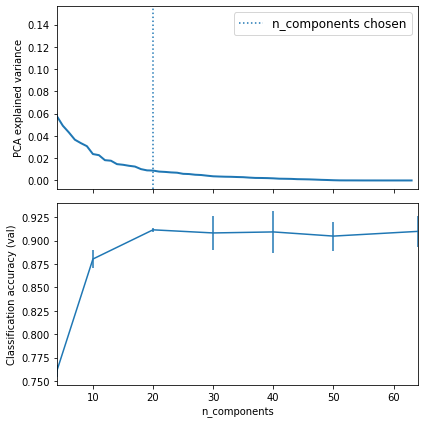

In [30]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0,ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6,6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel("PCA explained variance")

ax0.axvline(search.best_estimator_.named_steps["pca"].n_components, linestyle=":", label="n_components chosen")
ax0.legend(prop=dict(size=12))

# 繪製不同採樣點的分類正確率
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

In [20]:
best_clfs

,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__n_components,,,,,,,,,,,,,,
4,7,0.036244,0.006178,0.000997,4.052337e-07,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.732558,0.761269,0.770134,0.754654,0.016038,13
10,8,0.032584,0.003088,0.000665,4.701903e-04,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.887043,0.888147,0.867450,0.880880,0.009507,11
20,9,0.056183,0.011697,0.000333,4.703588e-04,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.921927,0.909850,0.890940,0.907572,0.012753,4
30,3,0.070478,0.005298,0.000333,4.704712e-04,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.901993,0.929883,0.879195,0.903690,0.020728,6
40,4,0.095247,0.008011,0.000333,4.705836e-04,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.893688,0.936561,0.895973,0.908741,0.019694,2
50,5,0.107055,0.007558,0.000665,4.701903e-04,0.0001,50,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.898671,0.933222,0.892617,0.908170,0.017886,3
64,6,0.115690,0.015895,0.000997,1.123916e-07,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.898671,0.933222,0.897651,0.909848,0.016533,1


In [18]:
pca.explained_variance_ratio_.shape

(64,)